A machine
learning model to predict the price of the house.
·       Performing the EDA
·       Applying linear regression
·       Applying multiple linear
regression
·       Evaluating the performance using
MAE, MSE, RMSE, R2Score
Applying hyper parameter tuning to improve
performance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# np.random.seed(11)

In [ ]:
data = pd.read_csv('boston.csv')


In [ ]:
data.head()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'HOUSEPRICE'],
      dtype='object')

In [ ]:
data.shape

(506, 13)

<Axes: >

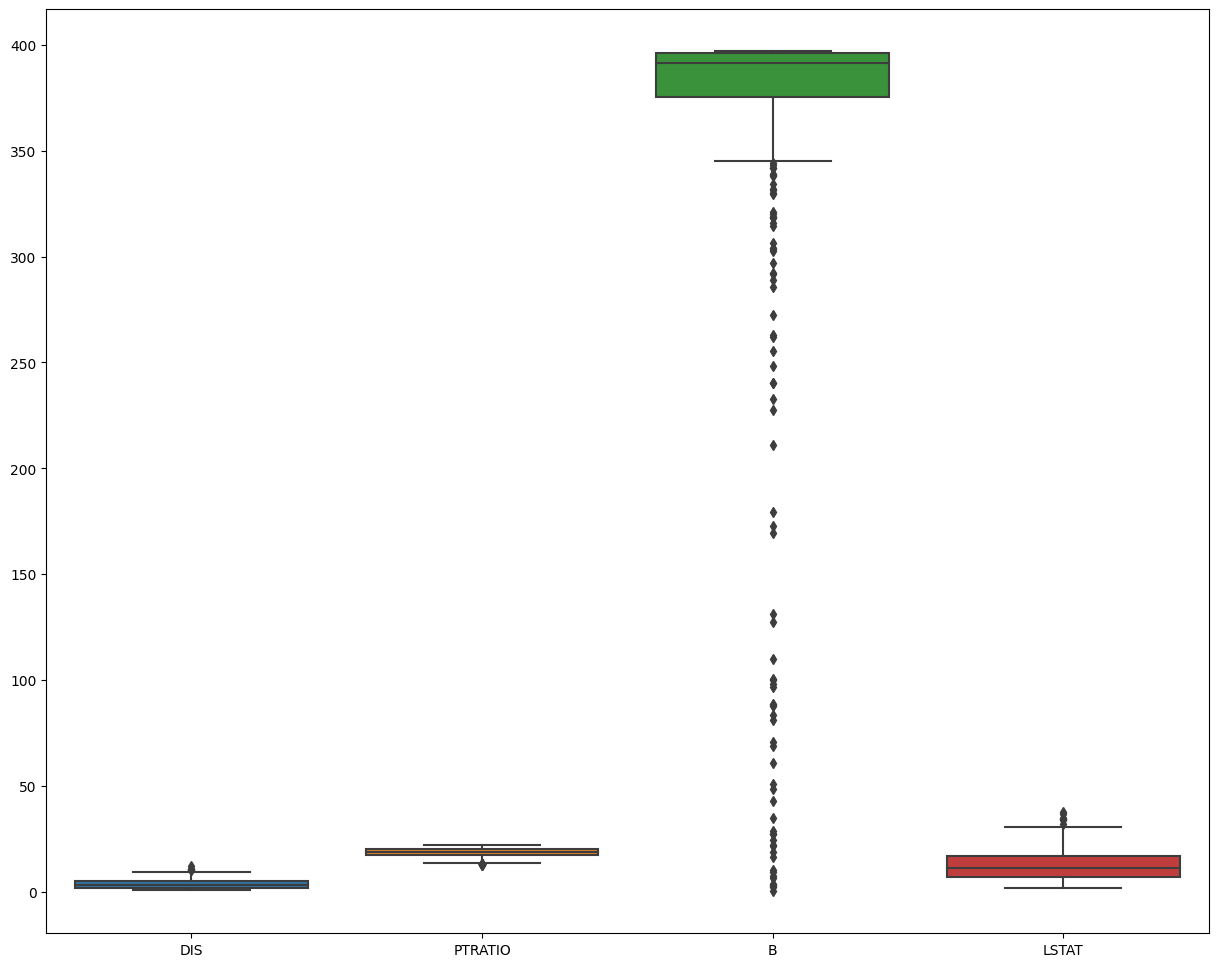

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=data[['DIS','PTRATIO', 'B', 'LSTAT']])

In [ ]:

def detect_outliers_iqr(data):
  outlier_list = []
  data = sorted(data)

  q1=np.percentile(data, 20)
  q3=np.percentile(data, 80)

  IQR = q3-q1

  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)

  for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
  return outlier_list

for i in ['DIS','PTRATIO', 'B', 'LSTAT']:
    outliers = detect_outliers_iqr(data[i])
    print("Outliers in",i,"attribute :", outliers)


Outliers in DIS attribute : [12.1265]
Outliers in PTRATIO attribute : []
Outliers in B attribute : [0.32, 2.52, 2.6, 3.5, 3.65, 6.68, 7.68, 9.32, 10.48, 16.45, 18.82, 21.57, 22.01, 24.65, 27.25, 27.49, 28.79, 35.05, 43.06, 48.45, 50.92, 60.72, 68.95, 70.8, 81.33, 83.45, 88.01, 88.27, 88.63, 96.73, 97.95, 100.19, 100.63, 109.85, 127.36, 131.42, 169.27, 172.91, 179.36, 210.97, 227.61, 232.6, 240.16, 240.52, 248.31, 255.23, 261.95, 262.76, 272.21, 285.83, 288.99, 291.55, 292.29, 297.09, 302.76, 303.42, 304.21, 306.38, 314.64]
Outliers in LSTAT attribute : [36.98, 37.97]


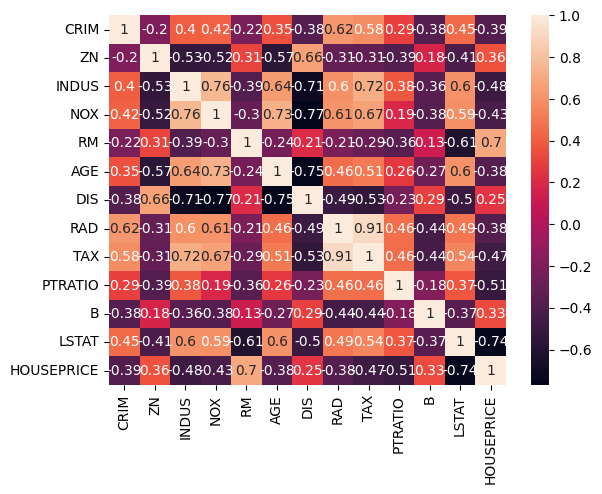

In [ ]:
sns.heatmap(data.corr(), annot = True);

In [ ]:
feature_cols = ['RM']
x = data[feature_cols] # Features
y = data.HOUSEPRICE # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 6)

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(379, 1)
(379,)
(127, 1)
(127,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
my_first_model = LinearRegression()

In [ ]:
my_first_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
my_first_model.coef_

array([8.90163172])

In [ ]:
my_first_model.intercept_

-33.32986790688852

In [ ]:
Pred = my_first_model.predict(X_test)

In [ ]:
Pred

array([31.76776487, 24.67316439, 25.58113082, 25.35859003, 22.12729771,
       19.6259392 , 25.92829446, 41.22129775, 23.93432895, 21.96706834,
       26.47129399, 19.86628326, 40.18870848, 27.68191591, 30.56604459,
       23.43583758, 18.80698908, 25.64344224, 17.93462917, 14.24045201,
       14.77454991, 25.73245856, 22.00267487, 19.14525109, 21.79793734,
       27.147818  , 19.0918413 , 25.56332756, 17.46284269, 19.36779188,
       20.84546275, 20.28465995, 27.9044567 , 37.25117001, 28.69670192,
       21.6466096 , 24.18357464, 19.4301033 , 19.73275878, 11.3474217 ,
       18.78028419, 17.52515411, 15.34425434, 16.75961379, 22.11839608,
       23.87201753, 28.8035215 , 20.92557743, 22.11839608, 21.72672429,
       19.73275878, 18.62895645, 19.01172661, 17.45394106, 35.13258166,
       28.59878397, 17.91682591, 25.6879504 , 23.11537883, 24.48623012,
       20.06211915, 19.83067673, 19.96420121, 22.88393641, 19.92859468,
       20.10662731, 30.29899563, 13.59953453, 23.65837837, 30.62

In [ ]:
y_test

375    15.0
347    23.1
223    30.1
501    22.4
286    20.1
       ... 
66     19.4
46     20.0
373    13.8
17     17.5
280    45.4
Name: HOUSEPRICE, Length: 127, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
my_linear_preds_train = my_first_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_first_model.score(X_train, y_train))

MAE on Train Data : 4.471245471080167
MSE on Train Data : 44.72432867809369
RMSE on Train Data : 6.687625040183824
R-squared on Train Data : 0.4649367630113449


In [ ]:
my_model_preds = my_first_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Train Data :', my_first_model.score(X_test, y_test))

MAE on Train Data : 4.410270616827614
MSE on Train Data : 40.35184326261802
RMSE on Train Data : 6.3523100729276445
R-squared on Train Data : 0.5318864547565921


In [ ]:
feature_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']
x = data[feature_cols] # Features
y = data.HOUSEPRICE # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 5)
(127, 5)
(379,)
(127,)


In [ ]:
my_multiple_linear_model = LinearRegression()

In [ ]:
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
my_multiple_linear_model.coef_

array([-0.19547367,  0.03239726, -0.15414065, -5.36374417,  7.03386763])

In [ ]:
my_multiple_linear_model.intercept_

-16.885650727990303

In [ ]:
Pred1 = my_multiple_linear_model.predict(X_test)

In [ ]:
Pred1

array([27.84110319, 30.28171618, 27.28792745, 30.71885827, 13.14298374,
       20.67907382, 29.24179651, 15.8708848 , 21.82347493, 35.93294762,
       22.07662504, 27.70334482, 23.32027461, 29.21595988, 29.02580821,
       38.64876028, 24.52976456, 19.51921036, 22.08472709, 18.25865849,
       25.44817546, 19.72783542, 22.59942362, 24.38805214, 32.1701919 ,
       20.82710129, 22.88040146, 19.30509708, 34.63534124,  5.99793256,
       33.28546001, 29.75833459, 28.75641248, 23.30248117, 21.68642998,
       19.18470388, 15.42752891, 33.0013057 , 21.57731332, 25.0100949 ,
       33.4593685 , 25.86923727, 19.77650854, 28.90454027, 22.01568556,
       28.81130145, 19.41302592, 18.04316523, 35.87125461, 20.4959258 ,
       17.58914895, 20.51141988, 21.41994312, 35.27085807, 25.96870065,
       30.23938485, 18.92023195, 18.35234561, 13.13473682, 24.33094254,
       20.65629241, 22.05287938, 35.46292316, 40.78325748, 25.78524125,
       19.55211461, 21.8753565 ,  3.36764743, 26.26136636, 38.63

In [ ]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
493    21.8
142    13.4
26     16.6
173    23.6
428    11.0
Name: HOUSEPRICE, Length: 127, dtype: float64

In [ ]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_train, y_train))


MAE on Train Data : 3.821919477858338
MSE on Train Data : 32.84611547397676
RMSE on Train Data : 5.731153066702787
R-squared on Train Data : 0.5782123476327115


In [ ]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_test, y_test))


MAE on Train Data : 4.806705557096143
MSE on Train Data : 47.58175546832411
RMSE on Train Data : 6.89795299116514
R-squared on Train Data : 0.5226921463156801
